In [1]:
%%capture
!pip install advertools

In [2]:
import pandas as pd
import advertools as adv
print(adv.__version__)

0.10.6


In [3]:
sitemap_url = "https://www.marketingandweb.es/sitemap.xml" 
df= adv.sitemap_to_df(sitemap_url)

INFO:root:Getting https://www.marketingandweb.es/sitemap-misc.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-tax-category.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-07.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-06.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-05.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-04.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-03.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-02.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2020-01.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2019-12.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2019-11.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2019-10.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-post-2019-09.xml
INFO:root:Get

INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-page-2014-05.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-page-2012-01.xml
INFO:root:Getting https://www.marketingandweb.es/sitemap-pt-page-2011-11.xml


In [4]:
#df[df["lastmod"] > '2010-01-01']
#df

In [5]:
from urllib.parse import urlparse

import re

In [6]:
example_url="https://www.marketingandweb.es/marketing/como-hacer-un-analisis-de-la-competencia/"

In [7]:
u = urlparse(example_url)

In [8]:
print(u)

ParseResult(scheme='https', netloc='www.marketingandweb.es', path='/marketing/como-hacer-un-analisis-de-la-competencia/', params='', query='', fragment='')


In [9]:
slug = re.split("[/-]", u.path)

print(slug)

['', 'marketing', 'como', 'hacer', 'un', 'analisis', 'de', 'la', 'competencia', '']


In [10]:
headline = " ".join(slug)

print(headline)

 marketing como hacer un analisis de la competencia 


In [11]:
headline = re.sub("\d{6}", "",headline)

print(headline)

 marketing como hacer un analisis de la competencia 


In [12]:
headline = headline.strip()

In [13]:
print(headline)

marketing como hacer un analisis de la competencia


In [14]:
if re.match("author|category", "autho stephen kenwright"):
    print("Ok")

In [60]:
def get_headline(url):

  u = urlparse(url)

  if len(u.path) > 1:

    slug = re.split("[/-]", u.path)

    new_headline = re.sub("\d{6}", ""," ".join(slug)).strip()

    #skip author and category pages

    if not re.match("author|category", new_headline):

        return new_headline

    return ""

In [61]:
#let's test it
get_headline(example_url)

'marketing como hacer un analisis de la competencia'

In [17]:
import pandas as pd

#skip the home page and headers
new_df = pd.read_csv("NPL.csv", names=["url", "Last Modified"], skiprows=2)

In [18]:
new_df["headline"] = new_df["url"].apply(lambda x: get_headline(x))
new_df

,url,Last Modified,headline
0,https://www.marketingandweb.es/ebook/seo-basico/,08 Aug 2020 21:48:34,ebook seo basico
1,https://www.marketingandweb.es/marketing/recup...,08 Aug 2020 21:01:32,marketing recuperar videos borrados
2,https://www.marketingandweb.es/formacion-en-ma...,08 Aug 2020 21:41:58,formacion en marketing digital y social media
3,https://www.marketingandweb.es/ebook/ebook-pan...,08 Aug 2020 21:45:13,ebook ebook panda score
4,https://www.marketingandweb.es/marketing/seo/,08 Aug 2020 23:00:22,marketing seo
5,https://www.marketingandweb.es/marketing/progr...,08 Aug 2020 21:07:46,marketing programas grabar cursos online
6,https://www.marketingandweb.es/emprendedores-2/,08 Aug 2020 23:14:32,emprendedores 2
7,https://www.marketingandweb.es/marketing/conve...,08 Aug 2020 21:12:04,marketing convertidores videos gratis
8,https://www.marketingandweb.es/ebook/seo-avanz...,08 Aug 2020 21:53:26,ebook seo avanzado
9,https://www.marketingandweb.es/marketing/embud...,08 Aug 2020 22:12:24,marketing embudo de ventas


In [19]:
new_df["url"]

0        https://www.marketingandweb.es/ebook/seo-basico/
1       https://www.marketingandweb.es/marketing/recup...
2       https://www.marketingandweb.es/formacion-en-ma...
3       https://www.marketingandweb.es/ebook/ebook-pan...
4           https://www.marketingandweb.es/marketing/seo/
5       https://www.marketingandweb.es/marketing/progr...
6         https://www.marketingandweb.es/emprendedores-2/
7       https://www.marketingandweb.es/marketing/conve...
8       https://www.marketingandweb.es/ebook/seo-avanz...
9       https://www.marketingandweb.es/marketing/embud...
10            https://www.marketingandweb.es/aviso-legal/
11                   https://www.marketingandweb.es/feed/
12      https://www.marketingandweb.es/congresos-de-ma...
13                   https://www.marketingandweb.es/blog/
14                    https://www.marketingandweb.es/web/
15      https://www.marketingandweb.es/marketing/redes...
16      https://www.marketingandweb.es/miguel-florido-10/
17            

In [20]:
new_df["url"].apply(lambda x: get_headline(x))

0                                        ebook seo basico
1                     marketing recuperar videos borrados
2           formacion en marketing digital y social media
3                                 ebook ebook panda score
4                                           marketing seo
5                marketing programas grabar cursos online
6                                         emprendedores 2
7                   marketing convertidores videos gratis
8                                      ebook seo avanzado
9                              marketing embudo de ventas
10                                            aviso legal
11                                                   feed
12          congresos de marketing digital y social media
13                                                   blog
14                                                    web
15                               marketing redes sociales
16                                      miguel florido 10
17            

In [21]:
new_df["headline"] = new_df["url"].apply(lambda x: get_headline(x))
new_df

,url,Last Modified,headline
0,https://www.marketingandweb.es/ebook/seo-basico/,08 Aug 2020 21:48:34,ebook seo basico
1,https://www.marketingandweb.es/marketing/recup...,08 Aug 2020 21:01:32,marketing recuperar videos borrados
2,https://www.marketingandweb.es/formacion-en-ma...,08 Aug 2020 21:41:58,formacion en marketing digital y social media
3,https://www.marketingandweb.es/ebook/ebook-pan...,08 Aug 2020 21:45:13,ebook ebook panda score
4,https://www.marketingandweb.es/marketing/seo/,08 Aug 2020 23:00:22,marketing seo
5,https://www.marketingandweb.es/marketing/progr...,08 Aug 2020 21:07:46,marketing programas grabar cursos online
6,https://www.marketingandweb.es/emprendedores-2/,08 Aug 2020 23:14:32,emprendedores 2
7,https://www.marketingandweb.es/marketing/conve...,08 Aug 2020 21:12:04,marketing convertidores videos gratis
8,https://www.marketingandweb.es/ebook/seo-avanz...,08 Aug 2020 21:53:26,ebook seo avanzado
9,https://www.marketingandweb.es/marketing/embud...,08 Aug 2020 22:12:24,marketing embudo de ventas


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 3 columns):
url              1011 non-null object
Last Modified    782 non-null object
headline         1011 non-null object
dtypes: object(3)
memory usage: 23.8+ KB


## Extrayendo los nombres de entidades
* Vamos a coger nuestra lista de cabeceras y convertirlo en un simple texto

In [23]:
new_df["headline"].tolist()[:10]

['ebook seo basico',
 'marketing recuperar videos borrados',
 'formacion en marketing digital y social media',
 'ebook ebook panda score',
 'marketing seo',
 'marketing programas grabar cursos online',
 'emprendedores 2',
 'marketing convertidores videos gratis',
 'ebook seo avanzado',
 'marketing embudo de ventas']

In [24]:
text = "\n".join([x for x in new_df["headline"].tolist() if len(x) > 0])

In [25]:
with open("text.txt", "w") as f:
    f.write(text)
print(text)

ebook seo basico
marketing recuperar videos borrados
formacion en marketing digital y social media
ebook ebook panda score
marketing seo
marketing programas grabar cursos online
emprendedores 2
marketing convertidores videos gratis
ebook seo avanzado
marketing embudo de ventas
aviso legal
feed
congresos de marketing digital y social media
blog
web
marketing redes sociales
miguel florido 10
ebooks
curso de marketing digital gratis
emprendedores 2 que es un blogger
marketing formas ganar dinero con un blog
marketing descargar audio video youtube
marketing plugins de wordpress imprescindibles basicos
marketing seo page 3
web como crear un blog
marketing redes sociales page 2
marketing seo curso gratuito
marketing estrategias link building
blog page 4
emprendedores 2 justificacion de un proyecto
marketing los mejores blogs de marketing digital
marketing cortar video online
web errores comunes blog
marketing seo page 2
web guia para hacer una pagina web desde cero
marketing salidas profesio

## Introduciendo la librería Spacy

In [26]:
!python -m spacy download es_core_news_sm


[!] Skipping model package dependencies and setting `--no-deps`. You don't seem
to have the spaCy package itself installed (maybe because you've built from
source?), so installing the model dependencies would cause spaCy to be
downloaded, which probably isn't what you want. If the model package has other
dependencies, you'll have to install them manually.
[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [27]:
from spacy import displacy
import es_core_news_sm
nlp = es_core_news_sm.load()
doc = nlp(text)

In [28]:
displacy.render(doc, style="ent", jupyter=True)

In [29]:
for tok in doc[:100]:
    print(tok.text, "...", tok.dep_)

ebook ... amod
seo ... nsubj
basico ... amod

 ... 
marketing ... flat
recuperar ... ROOT
videos ... obj
borrados ... amod

 ... 
formacion ... appos
en ... case
marketing ... obl
digital ... amod
y ... cc
social ... conj
media ... amod

 ... 
ebook ... amod
ebook ... amod
panda ... amod
score ... obj

 ... 
marketing ... obj
seo ... obj

 ... 
marketing ... flat
programas ... amod
grabar ... xcomp
cursos ... obj
online ... amod

 ... 
emprendedores ... obj
2 ... nummod

 ... 
marketing ... obj
convertidores ... amod
videos ... amod
gratis ... obj

 ... 
ebook ... amod
seo ... punct
avanzado ... amod

 ... 
marketing ... flat
embudo ... flat
de ... case
ventas ... nmod

 ... 
aviso ... obj
legal ... amod

 ... 
feed ... obj

 ... 
congresos ... obj
de ... case
marketing ... nmod
digital ... amod
y ... cc
social ... conj
media ... amod

 ... 
blog ... obj

 ... 
web ... flat

 ... 
marketing ... obj
redes ... obj
sociales ... amod

 ... 
miguel ... flat
florido ... amod
10 ... appos

 .

In [30]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

Para construir un gráfico de conocimiento, lo más importante son los nodos y los bordes entre ellos.

La idea principal es ir a través de una frase y extraer el sujeto y el objeto como y cuando se encuentran

In [31]:
def get_entities(sent):
    ## Primera parte
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # etiqueta de dependencia de la ficha anterior en la frase
    prv_tok_text = ""   # la señal anterior en la frase

    prefix = ""
    modifier = ""

      #############################################################
  
    for tok in nlp(sent):
        ## Segunda parte
        # si la ficha es un signo de puntuación, entonces pasa a la siguiente ficha
        if tok.dep_ != "punct":
            # comprobar: token es una palabra compuesta o no
            if tok.dep_ == "compound":
                prefix = tok.text
        # si la palabra anterior también era un "compuesto", entonces agregue la palabra actual a ella
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
      
      # comprobar: el token es un modificador o no
        if tok.dep_.endswith("mod") == True:
                modifier = tok.text
        # si la palabra anterior también era un "compuesto", entonces agregue la palabra actual a ella
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " "+ tok.text
      
              ## Tercera parte
        if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " "+ tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      

      ## Cuarta parte
        if tok.dep_.find("obj") == True:
                ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## Quinta parte  
      # actualizar variables
                prv_tok_dep = tok.dep_
                prv_tok_text = tok.text
              #############################################################

    return [ent1.strip(), ent2.strip()]

In [32]:
get_entities("La gran charla de JaviLazaro es sobre la medición de nuestras palabras con machine learning")

['gran  charla', '']

In [33]:
import spacy

from spacy import displacy

text = "\n".join([x for x in new_df["headline"].tolist() if len(x) > 0])

nlp = es_core_news_sm.load()

doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

In [62]:
for t in [x for x in new_df["headline"].tolist() if len(x) > 0][:1000]:
    print(get_entities(t))

['', '']
['marketing', '']
['', '']
['ebook  panda', '']
['', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['2  que', '']
['marketing', '']
['descargar', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['aumentar', '']
['emprendedores', '']
['', '']
['', '']
['', '']
['que', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['descargar', '']
['', '']
['', '']
['', '']
['', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['web', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['2  que', '']
['ebook', '']
['marketing', '']
['', '']
['que', '']
['', '']
['errores', '']
['', '']
['', '']
['', '']
['marketing', '']
['marketing', '']
['', '']
['', '']
['marketing', '']
['', ''

['congreso', '']
['', '']
['', '']
['', '']
['marketing', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['que', '']
['infografias', '']
['', '']
['', '']
['marketing', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['congreso', '']
['', '']
['congreso', '']
['congreso', '']
['congreso', '']
['', '']
['congreso', '']
[

In [35]:
entity_pairs = []

for i in tqdm([x for x in new_df["headline"].tolist() if len(x) > 0]):
    entity_pairs.append(get_entities(i))

100%|███████████████████████████████████████████████████████████████████████████████| 939/939 [00:09<00:00, 101.68it/s]


In [70]:
entity_pairs[:20]

[['', ''],
 ['marketing', ''],
 ['', ''],
 ['ebook  panda', ''],
 ['', ''],
 ['marketing', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['2  que', '']]

Nuestra hipótesis es que el predicado es en realidad el verbo principal de una frase

In [37]:
def get_relation(sent):
    doc = nlp(sent)

  # Objeto de clase Matcher 
    matcher = Matcher(nlp.vocab)

  # Definir el patrón
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [38]:
get_relation("JaviLazaro habla de procesamiento de lenguaje natural")


'habla'

In [39]:
relations = [get_relation(i) for i in tqdm([x for x in new_df["headline"].tolist() if len(x) > 0])]


100%|████████████████████████████████████████████████████████████████████████████████| 939/939 [00:09<00:00, 98.45it/s]


In [40]:
entity_pairs[10:20]

[['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['', ''],
 ['2  que', '']]

In [71]:
relations[10:20]

['aviso legal',
 'feed',
 'congresos',
 'blog',
 'web',
 'marketing',
 'miguel florido',
 'ebooks',
 'curso',
 'emprendedores']

In [42]:
pd.Series(relations).value_counts()[4:50]

emprendedores          23
marketing mejores      17
web                    15
bridge                 13
jquery                 10
crear                   8
blog                    6
jose                    5
conseguir               5
instagram               4
descargar               4
errores                 3
curriculum              3
1.jpeg                  3
mejorar                 3
marketing trucos        3
semrush                 3
ebook                   3
ganar                   3
gusta                   2
recuperar               2
yolanda                 2
josep                   2
marketing peores        2
marketing tutorial      2
marketing manual        2
miguel florido          2
aumentar                2
ideas                   2
curso                   2
estudio                 2
marketing curso         2
ecommerce               2
marketing diseno        2
seo comunes             2
javi                    2
grabar                  2
problemas novedades     2
teresa      

Construyamos el gráfico

In [43]:
# extraemos los sujetos
source = [i[0] for i in entity_pairs]

# extrae el objeto
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [44]:
# crear un gráfico dirigido desde un dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

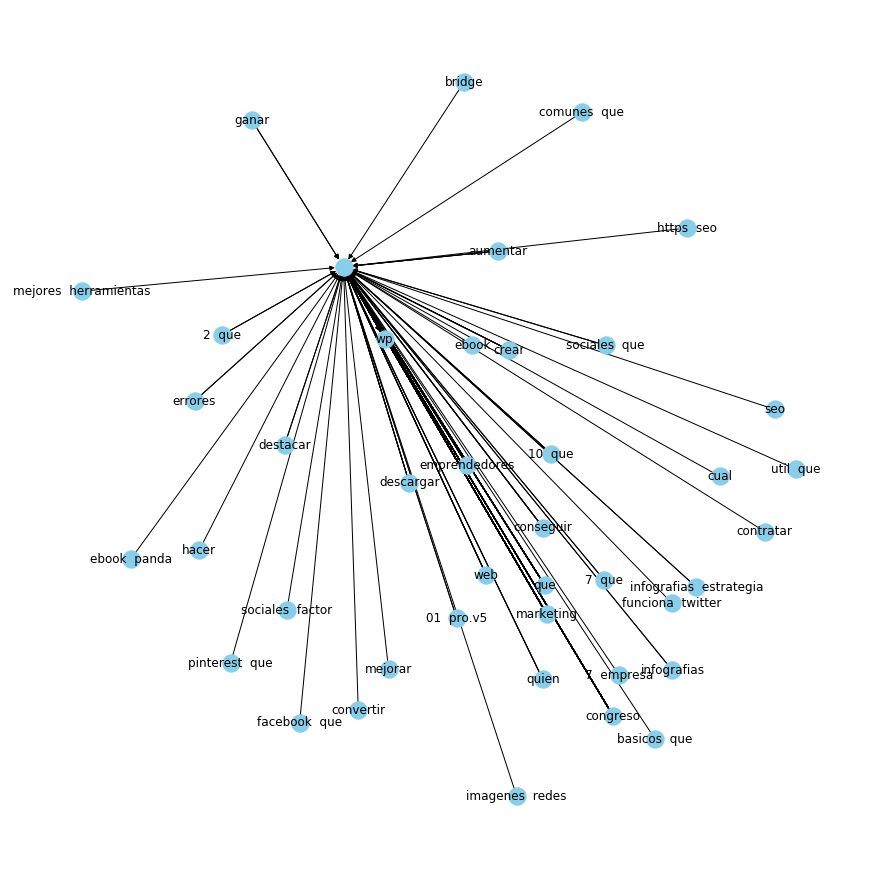

In [63]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [46]:
def display_graph(relation):

    G=nx.from_pandas_edgelist(kg_df[kg_df['edge']==relation], "source", "target", 
                            edge_attr=True, create_using=nx.MultiDiGraph())

    plt.figure(figsize=(12,12))
    pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
    plt.show()

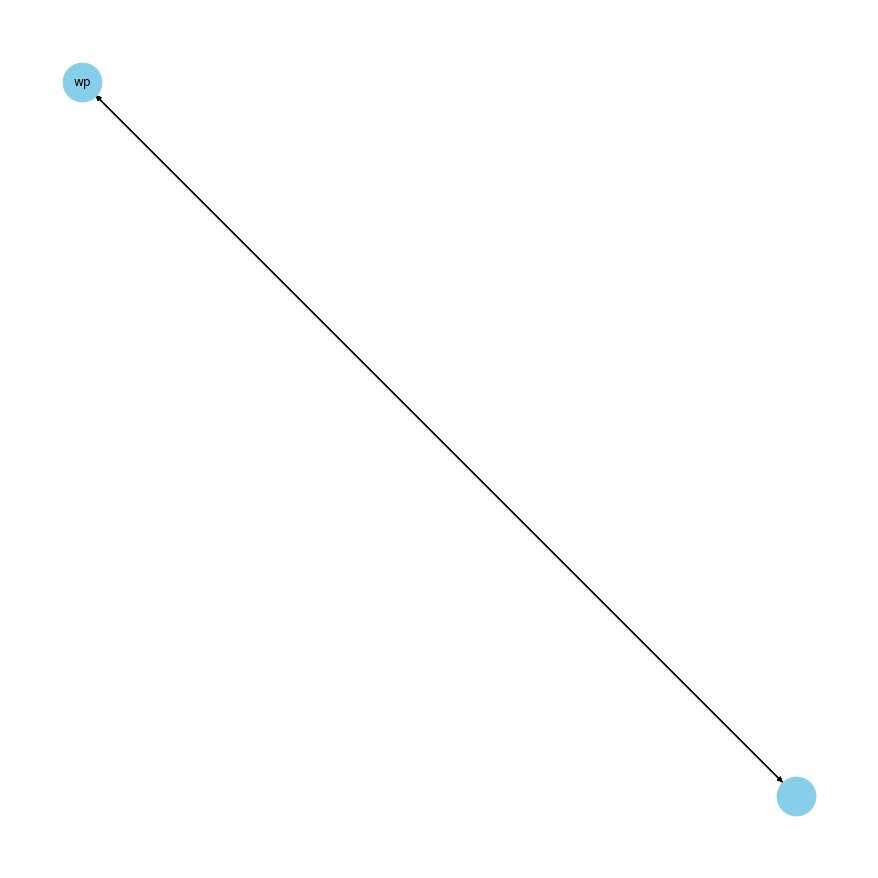

In [75]:
display_graph("jquery")

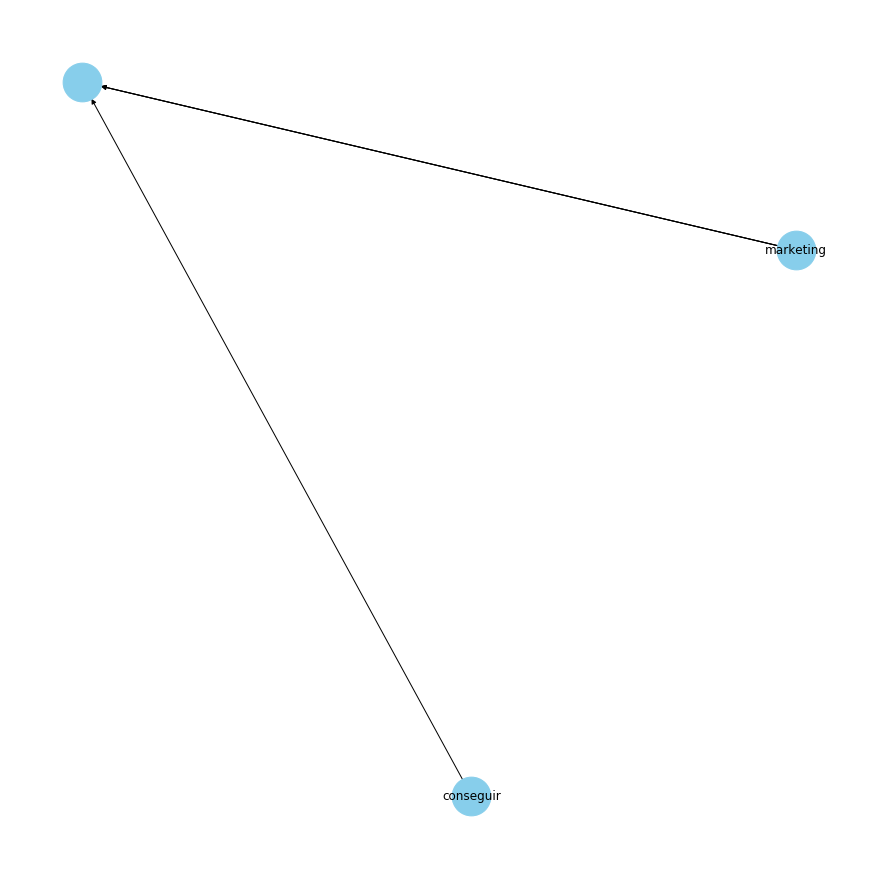

In [79]:
display_graph("instagram")

In [48]:
pd.Series(relations).value_counts()[4:50].to_dict()


{'emprendedores': 23,
 'marketing mejores': 17,
 'web': 15,
 'bridge': 13,
 'jquery': 10,
 'crear': 8,
 'blog': 6,
 'jose': 5,
 'conseguir': 5,
 'instagram': 4,
 'descargar': 4,
 'errores': 3,
 'curriculum': 3,
 '1.jpeg': 3,
 'mejorar': 3,
 'marketing trucos': 3,
 'semrush': 3,
 'ebook': 3,
 'ganar': 3,
 'gusta': 2,
 'recuperar': 2,
 'yolanda': 2,
 'josep': 2,
 'marketing peores': 2,
 'marketing tutorial': 2,
 'marketing manual': 2,
 'miguel florido': 2,
 'aumentar': 2,
 'ideas': 2,
 'curso': 2,
 'estudio': 2,
 'marketing curso': 2,
 'ecommerce': 2,
 'marketing diseno': 2,
 'seo comunes': 2,
 'javi': 2,
 'grabar': 2,
 'problemas novedades': 2,
 'teresa': 2,
 'fernando': 2,
 'estrategia': 2,
 'juan': 2,
 'enviar': 2,
 'angela serrano': 2,
 'carla': 2,
 'proteger': 2}

In [49]:
relation_list = list(pd.Series(relations).value_counts()[4:50].to_dict().keys())
relation_list


['emprendedores',
 'marketing mejores',
 'web',
 'bridge',
 'jquery',
 'crear',
 'blog',
 'jose',
 'conseguir',
 'instagram',
 'descargar',
 'errores',
 'curriculum',
 '1.jpeg',
 'mejorar',
 'marketing trucos',
 'semrush',
 'ebook',
 'ganar',
 'gusta',
 'recuperar',
 'yolanda',
 'josep',
 'marketing peores',
 'marketing tutorial',
 'marketing manual',
 'miguel florido',
 'aumentar',
 'ideas',
 'curso',
 'estudio',
 'marketing curso',
 'ecommerce',
 'marketing diseno',
 'seo comunes',
 'javi',
 'grabar',
 'problemas novedades',
 'teresa',
 'fernando',
 'estrategia',
 'juan',
 'enviar',
 'angela serrano',
 'carla',
 'proteger']

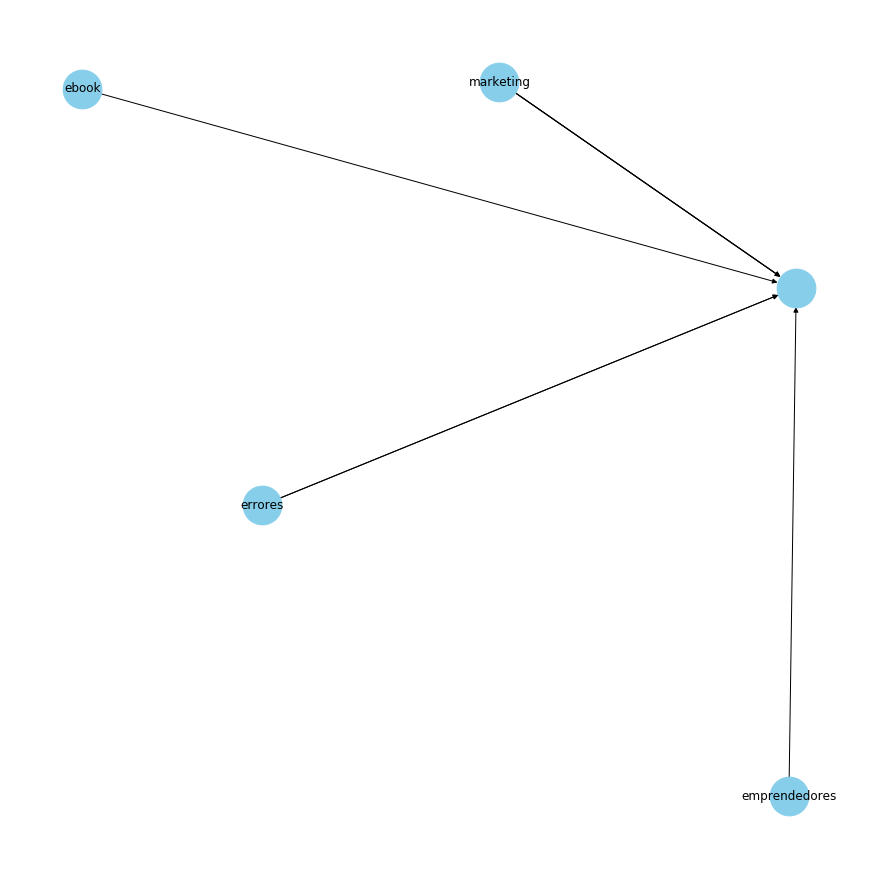

In [72]:
relation_choice = "crear"  #@param ['crear', 'blog',  'congreso gratuito', 'marketing peores', 'pensando', 'factor' ]

display_graph(relation_choice)

## Ahora midamos por frases dentro de nuestra web

In [51]:
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from bs4 import BeautifulSoup
import re
import requests
import es_core_news_md
npl = es_core_news_md.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Megaport\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.marketingandweb.es/ebook/seo-basico/')
article = npl(ny_bb)
len(article.ents)

48

In [53]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'MISC': 32, 'PER': 3, 'ORG': 9, 'LOC': 4})

In [54]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Twitter', 2),
 ('másEmprendedoresNegocios OnlineeCommerceVender', 2),
 ('Internet¿Quién Soy?FormaciónCongresosContactoeBooksEscuelaMáster', 2)]

In [55]:
sentences = [x for x in article.sents]
print(sentences[1])

El ebook está dividido en 8 secciones, donde a lo largo de 70 páginas podrás recorrer algunos aspectos que considero primordiales si queremos trabajar el posicionamiento en buscadores.


In [56]:
displacy.render(npl(str(sentences[1])), jupyter=True, style='ent')

C:\Users\Megaport\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [84]:
displacy.render(npl(str(sentences[1])), style='dep', jupyter = True, options = {'distance': 60})

In [58]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in npl(str(sentences[1])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('ebook', 'NOUN', 'ebook'),
 ('dividido', 'ADJ', 'dividir'),
 ('8', 'NUM', '8'),
 ('secciones', 'NOUN', 'seccionar'),
 ('a', 'ADP', 'a'),
 ('70', 'NUM', '70'),
 ('páginas', 'NOUN', 'página'),
 ('podrás', 'AUX', 'poder'),
 ('recorrer', 'VERB', 'recorrer'),
 ('aspectos', 'NOUN', 'aspecto'),
 ('considero', 'VERB', 'considerar'),
 ('primordiales', 'ADJ', 'primordial'),
 ('posicionamiento', 'NOUN', 'posicionamiento'),
 ('buscadores', 'NOUN', 'buscador')]

In [59]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[1]])

[(El, 'B', 'MISC'), (ebook, 'I', 'MISC'), (está, 'O', ''), (dividido, 'O', ''), (en, 'O', ''), (8, 'O', ''), (secciones, 'O', ''), (,, 'O', ''), (donde, 'O', ''), (a, 'O', ''), (lo, 'O', ''), (largo, 'O', ''), (de, 'O', ''), (70, 'O', ''), (páginas, 'O', ''), (podrás, 'O', ''), (recorrer, 'O', ''), (algunos, 'O', ''), (aspectos, 'O', ''), (que, 'O', ''), (considero, 'O', ''), (primordiales, 'O', ''), (si, 'O', ''), (queremos, 'O', ''), (trabajar, 'O', ''), (el, 'O', ''), (posicionamiento, 'O', ''), (en, 'O', ''), (buscadores, 'O', ''), (., 'O', '')]
